In [134]:
import quantrocket.master
import pandas as pd, numpy as np
import math
from quantrocket import get_prices
from quantrocket.zipline import ingest_bundle

from collections import defaultdict

In [ ]:
ingest_bundle("usstock-1d")

{'status': 'the data will be ingested asynchronously'}

In [223]:
prices = get_prices("usstock-1d", universes="usstock", start_date="2017-01-01", fields=["Close"])

In [224]:
prices = prices.dropna(axis=1, thresh=100)
prices = prices.dropna(axis=1, thresh=1000)

In [225]:
prices.head()

Sid               FIBBG000C2V3D6  FIBBG00B3T3HD3  FIBBG000V2S3P6  \
Field Date                                                         
Close 2017-01-03          44.367          28.556           1.952   
      2017-01-04          44.950          29.972           1.977   
      2017-01-05          44.415          30.358           1.933   
      2017-01-06          45.799          30.388           1.881   
      2017-01-09          45.942          29.200           1.828   

Sid               FIBBG000BD1373  FIBBG00GNHC1T4  FIBBG005P7Q881  \
Field Date                                                         
Close 2017-01-03           9.160             NaN          44.741   
      2017-01-04           9.263             NaN          45.128   
      2017-01-05           9.135             NaN          44.345   
      2017-01-06           9.050             NaN          44.654   
      2017-01-09           9.111             NaN          45.495   

Sid               FIBBG003PNL136  FIBBG000B9XB24  FIBBG000D9V7T4  \
Field Date                                                         
Close 2017-01-03           53.00           3.979          26.691   
      2017-01-04           55.95           3.979          27.251   
      2017-01-05           58.00           3.737          26.197   
      2017-01-06           59.00           3.979          25.820   
      2017-01-09           59.90           3.834          26.147   

Sid               FIBBG000D6VW15  ...  FIBBG00DY7QWH1  FIBBG000BXB8X8  \
Field Date                        ...                                   
Close 2017-01-03           23.10  ...          11.527           5.317   
      2017-01-04           23.51  ...          11.603           5.348   
      2017-01-05           22.81  ...          12.265           5.359   
      2017-01-06           22.42  ...          12.614           5.350   
      2017-01-09           22.24  ...          12.293           5.335   

Sid               FIBBG0039320N9  FIBBG000PYX812  FIBBG000BT3HG5  \
Field Date                                                         
Close 2017-01-03          51.471           22.00             NaN   
      2017-01-04          51.970           22.75             NaN   
      2017-01-05          51.797           20.60             NaN   
      2017-01-06          51.961           19.85             NaN   
      2017-01-09          51.817           19.95             NaN   

Sid               FIBBG000C3CQP1  FIBBG00GD15LJ5  FIBBG007BBS8B7  \
Field Date                                                         
Close 2017-01-03           10.28             NaN           17.95   
      2017-01-04           10.42             NaN           18.85   
      2017-01-05           10.26             NaN           19.20   
      2017-01-06           10.36             NaN           18.32   
      2017-01-09           10.41             NaN           18.08   

Sid               FIBBG000BJBXZ2  FIBBG011MC2100  
Field Date                                        
Close 2017-01-03             NaN           3.198  
      2017-01-04             NaN           3.155  
      2017-01-05             NaN           3.198  
      2017-01-06             NaN           3.177  
      2017-01-09             NaN           3.155  

[5 rows x 5147 columns]

In [226]:
prices

Sid               FIBBG000C2V3D6  FIBBG00B3T3HD3  FIBBG000V2S3P6  \
Field Date                                                         
Close 2017-01-03          44.367          28.556           1.952   
      2017-01-04          44.950          29.972           1.977   
      2017-01-05          44.415          30.358           1.933   
      2017-01-06          45.799          30.388           1.881   
      2017-01-09          45.942          29.200           1.828   
...                          ...             ...             ...   
      2023-02-14         153.040          48.930           1.780   
      2023-02-15         151.750          48.410           1.850   
      2023-02-16         148.280          48.770           2.000   
      2023-02-17         148.260          46.890           2.150   
      2023-02-21             NaN             NaN             NaN   

Sid               FIBBG000BD1373  FIBBG00GNHC1T4  FIBBG005P7Q881  \
Field Date                                                         
Close 2017-01-03           9.160             NaN          44.741   
      2017-01-04           9.263             NaN          45.128   
      2017-01-05           9.135             NaN          44.345   
      2017-01-06           9.050             NaN          44.654   
      2017-01-09           9.111             NaN          45.495   
...                          ...             ...             ...   
      2023-02-14           3.010          19.443          16.790   
      2023-02-15           3.020             NaN          16.800   
      2023-02-16           3.000          19.550          16.390   
      2023-02-17           3.010          19.550          16.360   
      2023-02-21             NaN             NaN             NaN   

Sid               FIBBG003PNL136  FIBBG000B9XB24  FIBBG000D9V7T4  \
Field Date                                                         
Close 2017-01-03           53.00           3.979          26.691   
      2017-01-04           55.95           3.979          27.251   
      2017-01-05           58.00           3.737          26.197   
      2017-01-06           59.00           3.979          25.820   
      2017-01-09           59.90           3.834          26.147   
...                          ...             ...             ...   
      2023-02-14           39.25           2.390          22.850   
      2023-02-15           41.23           2.270          23.650   
      2023-02-16           40.54           2.420          23.530   
      2023-02-17           40.61           2.470          23.420   
      2023-02-21             NaN             NaN             NaN   

Sid               FIBBG000D6VW15  ...  FIBBG00DY7QWH1  FIBBG000BXB8X8  \
Field Date                        ...                                   
Close 2017-01-03           23.10  ...          11.527           5.317   
      2017-01-04           23.51  ...          11.603           5.348   
      2017-01-05           22.81  ...          12.265           5.359   
      2017-01-06           22.42  ...          12.614           5.350   
      2017-01-09           22.24  ...          12.293           5.335   
...                          ...  ...             ...             ...   
      2023-02-14            2.70  ...          26.750           6.780   
      2023-02-15            2.83  ...          26.240           6.760   
      2023-02-16            2.95  ...          25.750           6.740   
      2023-02-17            2.80  ...          25.010           6.770   
      2023-02-21             NaN  ...             NaN             NaN   

Sid               FIBBG0039320N9  FIBBG000PYX812  FIBBG000BT3HG5  \
Field Date                                                         
Close 2017-01-03          51.471           22.00             NaN   
      2017-01-04          51.970           22.75             NaN   
      2017-01-05          51.797           20.60             NaN   
      2017-01-06          51.961           19.85       

In [42]:
prices.ewm(alpha=0.9).mean().head()

Sid               FIBBG000C2V3D6  FIBBG00B3T3HD3  FIBBG000V2S3P6  \
Field Date                                                         
Close 2017-01-03       44.367000       28.556000        1.952000   
      2017-01-04       44.897000       29.843273        1.974727   
      2017-01-05       44.462766       30.306991        1.937135   
      2017-01-06       45.665497       30.379906        1.886608   
      2017-01-09       45.914352       29.317980        1.833860   

Sid               FIBBG000BD1373  FIBBG00GNHC1T4  FIBBG005P7Q881  \
Field Date                                                         
Close 2017-01-03        9.160000             NaN       44.741000   
      2017-01-04        9.253636             NaN       45.092818   
      2017-01-05        9.146757             NaN       44.419108   
      2017-01-06        9.059667             NaN       44.630532   
      2017-01-09        9.105867             NaN       45.408561   

Sid               FIBBG003PNL136  FIBBG000B9XB24  FIBBG000D9V7T4  \
Field Date                                                         
Close 2017-01-03       53.000000        3.979000       26.691000   
      2017-01-04       55.681818        3.979000       27.200091   
      2017-01-05       57.770270        3.760982       26.296405   
      2017-01-06       58.877138        3.957218       25.867598   
      2017-01-09       59.797723        3.846321       26.119062   

Sid               FIBBG000D6VW15  ...  FIBBG006TL19Y0  FIBBG00DY7QWH1  \
Field Date                        ...                                   
Close 2017-01-03       23.100000  ...      547.427000       11.527000   
      2017-01-04       23.472727  ...      603.429727       11.596091   
      2017-01-05       22.875676  ...      671.541685       12.198712   
      2017-01-06       22.465527  ...      734.993814       12.572509   
      2017-01-09       22.262551  ...      766.534797       12.320948   

Sid               FIBBG000BXB8X8  FIBBG0039320N9  FIBBG000PYX812  \
Field Date                                                         
Close 2017-01-03        5.513000       51.592000       22.000000   
      2017-01-04        5.542091       52.046545       22.681818   
      2017-01-05        5.555523       51.931640       20.806306   
      2017-01-06        5.547851       52.067878       19.945545   
      2017-01-09        5.533585       51.950987       19.949554   

Sid               FIBBG000BT3HG5  FIBBG000C3CQP1  FIBBG00GD15LJ5  \
Field Date                                                         
Close 2017-01-03             NaN       10.280000             NaN   
      2017-01-04             NaN       10.407273             NaN   
      2017-01-05             NaN       10.274595             NaN   
      2017-01-06             NaN       10.351467             NaN   
      2017-01-09             NaN       10.404147             NaN   

Sid               FIBBG007BBS8B7  FIBBG011MC2100  
Field Date                                        
Close 2017-01-03       17.950000        3.198000  
      2017-01-04       18.768182        3.158909  
      2017-01-05       19.157207        3.194126  
      2017-01-06       18.403645        3.178711  
      2017-01-09       18.112362        3.157371  

[5 rows x 5112 columns]

In [172]:
df = prices[['FIBBG000C2V3D6', 'FIBBG00B3T3HD3']].head(4)

In [173]:
df

Sid               FIBBG000C2V3D6  FIBBG00B3T3HD3
Field Date                                      
Close 2017-01-03          44.367          28.556
      2017-01-04          44.950          29.972
      2017-01-05          44.415          30.358
      2017-01-06          45.799          30.388

In [199]:
def get_df_ema(df, alpha):
    emas = defaultdict(int)
    ema_serieses = []

    for i, v in enumerate(df.head(1).values[0]):
        emas[df.columns[i]] = v

    for r in df.iterrows():
        r_ema = [0 for _ in range(len(r[1]))]
        for i, v in enumerate(r[1]):
            ema = (1-alpha) * emas[df.columns[i]] + alpha * v
            emas[df.columns[i]] = ema
            r_ema[i] = ema
        ema_serieses.append(r_ema)

    return pd.DataFrame(data=ema_serieses, columns=df.columns, index=df.index.get_level_values(1))

In [218]:
# hyper params
alpha_min, alpha_max = 0.6, 0.9
beta = 0.1
gamma = 0.5

def get_df_ama(df, alpha_min, alpha_max, beta, gamma):
    alphas = defaultdict(int)
    amas = defaultdict(int)
    dposs = defaultdict(int)
    dnegs = defaultdict(int)
    ps = defaultdict(int)
    ama_serieses = [[0 for _ in df.columns]]

    # init
    for i, p in enumerate(df.head(1).values[0]):
        amas[df.columns[i]] = p
        ama_serieses[0][i] = p
        alphas[df.columns[i]] = alpha_min

    cnt = 0
    is_first_row = True
    for r in df.iterrows():
        if is_first_row:
            is_first_row = False
            for i, p in enumerate(r[1]):
                ps[df.columns[i]] = p
            continue

        cnt += 1
        r_ama = [0 for _ in range(len(r[1]))]
        for i, p in enumerate(r[1]):
            sid = df.columns[i]
            ama = alphas[sid] * p + (1-alphas[sid]) * amas[sid]
            r_ama[i] = ama
            change = (p - ps[sid]) / ps[sid]
            dpos = alphas[sid] * max(change, 0) + (1-alphas[sid]) * dposs[sid]
            dneg = -alphas[sid] * min(change, 0) + (1-alphas[sid]) * dnegs[sid]

            # depond on above
            h = (1 + beta * dnegs[sid]) * ama
            l = (1 - beta * dnegs[sid]) * ama
            pa = (p - amas[sid]) / amas[sid]
            if p > h:
                s = (beta * dpos)
                if s == 0:
                    snr = 0
                else:
                    snr = pa / (beta * dpos)
            elif p < l:
                snr = -pa / (beta * dneg)
            else:
                snr = 0

            # depend on above
            alpha = alpha_min + (alpha_max - alpha_min) * math.atan(gamma * snr) / (math.pi / 2)

            #print(f'sid: {sid}, ama: {ama}, dpos: {dpos}, dneg: {dneg}, alpha: {alpha}, h: {h}, l: {l}, snr: {snr}, p: {p}, change: {change}')
            # update
            amas[df.columns[i]] = ama
            dposs[df.columns[i]] = dpos
            dnegs[df.columns[i]] = dneg
            alphas[df.columns[i]] = alpha
            ps[df.columns[i]] = p

        ama_serieses.append(r_ama)

    return pd.DataFrame(data=ama_serieses, columns=df.columns, index=df.index.get_level_values(1))    

In [216]:
df

Sid               FIBBG000C2V3D6  FIBBG00B3T3HD3
Field Date                                      
Close 2017-01-03          44.367          28.556
      2017-01-04          44.950          29.972
      2017-01-05          44.415          30.358
      2017-01-06          45.799          30.388

In [221]:
sid = 'FIBBG000C2V3D6'

In [202]:
prices_ema = get_df_ema(prices[[sid]], alpha=0.3)

In [205]:
prices_ama = get_df_ama(prices[[sid]], alpha_min=0.3, alpha_max=0.7, beta=0.5, gamma=0.5)

In [219]:
prices_ama = get_df_ama(prices, alpha_min=0.3, alpha_max=0.7, beta=0.5, gamma=0.5)

<AxesSubplot:xlabel='Field,Date'>

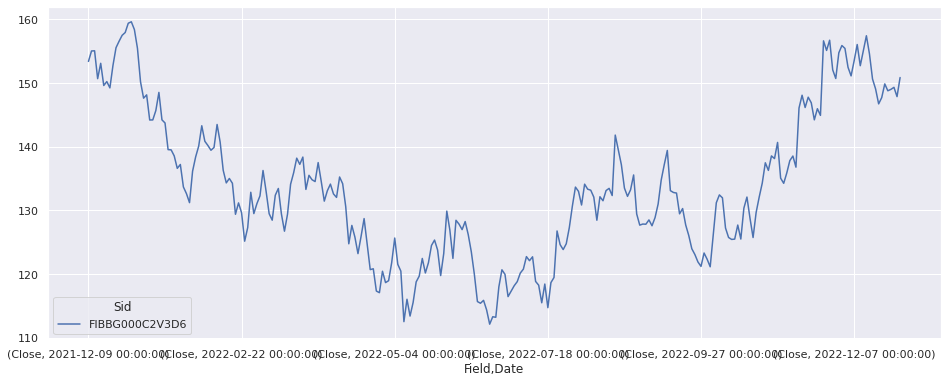

In [209]:
prices[[sid]].iloc[-300:].plot()

<AxesSubplot:xlabel='Date'>

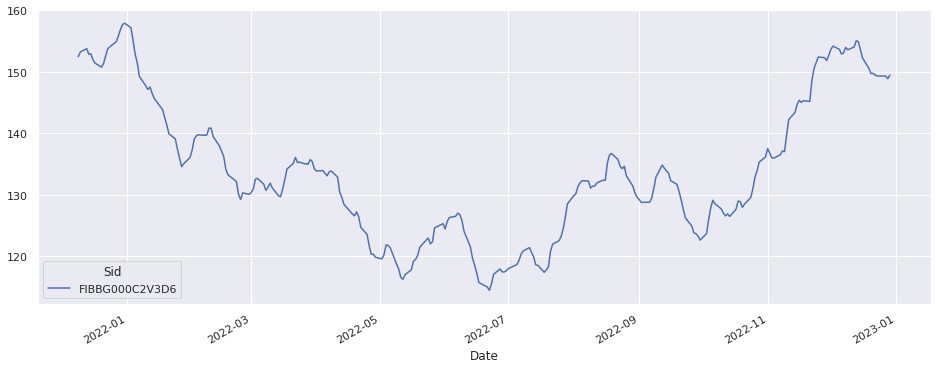

In [210]:
prices_ema[[sid]].iloc[-300:].plot()

<AxesSubplot:xlabel='Date'>

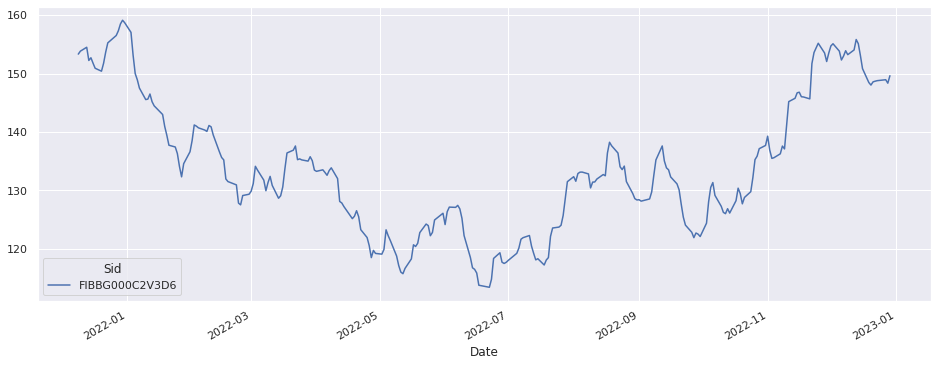

In [220]:
prices_ama[[sid]].iloc[-300:].plot()